### Submitted by:  
    Saurabh Kumar  
    SC22B146

# Introduction

In this homework, we’ll see how to create and launch a face detection algorithm in Python using OpenCV and Dlib. We will go through the most basic implementations of face detection including Cascade Classifiers, and HOG windows.

We’ll cover face detection using :

1. Haar Cascade Classifiers using OpenCV
   
2. Histogram of Oriented Gradients using Dlib
   
---



### Requirements

The first step is to install OpenCV, and Dlib.
OpenCV

OpenCV, an open source library for computer vision, written in C/C++, that has interfaces in C++, Python and Java. It supports Windows, Linux, MacOS, iOS and Android.

Installing OpenCV ----> pip install opencv-python
NumPy

Installing NumPy -----> pip install numpy
Imutils

Installing Imutils -----> pip install imutils
Dlib

pip install dlib

Note: Installing Dlib is bit tricky and most of the time it throws up an error "unable to build dlib setup.py". If yor are facing this, then:


For Python 3.6 windows- just run the following command

pip install https://pypi.python.org/packages/da/06/bd3e241c4eb0a662914b3b4875fc52dd176a9db0d4a2c915ac2ad8800e9e/dlib-19.7.0-cp36-cp36m-win_amd64.whl#md5=b7330a5b2d46420343fbed5df69e6a3f



For Other versions of Python for both Ubuntu and Windows -

1. Install Boost - pip install boost
2. Install Visual Studio
3. Install Cmake
4. Install numpy+mkl
5. lastly, install dlib - pip install dlib



## 1. Cascade Classifiers

Cascade classifier, or namely cascade of boosted classifiers working with haar-like features, is a special case of ensemble learning, called boosting. It typically relies on Adaboost classifiers (and other models such as Real Adaboost, Gentle Adaboost or Logitboost). Cascade classifiers are trained on a few hundred sample images of image that contain the object we want to detect, and other images that do not contain those images.

How can we detect if a face is there or not ? There is an algorithm, called Viola–Jones object detection framework, that includes all the steps required for live face detection :

1. Haar Feature Selection, features derived from Haar wavelets
2. Create integral image
3. Adaboost Training
4. Cascading Classifiers

#### Haar Feature Selection
There are some common features that we find on most common human faces :
1. A dark eye region compared to upper-cheeks
2. A bright nose bridge region compared to the eyes
3. Some specific location of eyes, mouth, nose

The characteristics are called Haar Features. The feature extraction process will look like this :

<img src="./file/haarcascade.png">

In this example, the first feature measures the difference in intensity between the region of the eyes and a region across the upper cheeks. The feature value is simply computed by summing the pixels in the black area and subtracting the pixels in the white area.

<img src="./file/haarcascade1.png">

Then, we apply this rectangle as a convolutional kernel, over our whole image. In order to be exhaustive, we should apply all possible dimensions and positions of each kernel. A simple 24*24 images would typically result in over 160’000 features, each made of a sum/subtraction of pixels values. It would computationally be impossible for live face detection. So, how do we speed up this process ?
1. once the good region has been identified by a rectangle, it is useless to run the window over a completely different region of the image. This can be achieved by Adaboost.
2. compute the rectangle features using the integral image principle, which is way faster. We’ll cover this in the next section.

Now that the features have been selected, we apply them on the set of training images using Adaboost classification, that combines a set of weak classifiers to create an accurate ensemble model. With 200 features (instead of 160’000 initially), an accuracy of 95% is achieved. The authors of the paper have selected 6’000 features.

### Integral Image:

To quote an answer on quora - https://www.quora.com/How-integral-image-is-used-in-image-processing-and-how-improves-the-computation-time

Integral image is an image we get by cumulative addition of intensities on subsequent pixels in both horizontal and vertical axis.
In image processing, we generally rely on features specific to certain regions of the entire image. Hence, we need properties of those specific regions

Adaboost algorithm:

<img src="./file/adaboost.png">

The above algorithm shows the steps taken to choose the appropriate classifiers

# Exercise

 STUDENT TASK: Complete the missing parts in this face detection program

 Follow the instructions in the comments for each task

In [2]:
%matplotlib inline

In [ ]:
import cv2
import matplotlib.pyplot as plt

def detectFaces(imgpath):
    # TASK 1: Load the Haar Cascade classifier for face detection
    # Hint: Use cv2.CascadeClassifier() with the path to the XML file
    cascPath = "./haarcascades/haarcascade_frontalface_default.xml"
    faceCascade = cv2.CascadeClassifier(cascPath)
    
    # Set up font for text overlay
    font = cv2.FONT_HERSHEY_SIMPLEX
    
    # TASK 2: Load the image and convert color spaces
    # Hint: Use cv2.imread() and cv2.cvtColor()
    frame = cv2.imread(imgpath) # Load the image
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB) # Convert from BGR to RGB for display
    
    # TASK 3: Convert the image to grayscale (required for Haar Cascade)
    gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
    
    # TASK 4: Detect faces in the image using the cascade classifier
    # Hint: Use the detectMultiScale method with appropriate parameters
    faces = faceCascade.detectMultiScale(
        gray,
        scaleFactor=1.1, # Try values between 1.1-1.3
        minNeighbors=3, # Try values between 3-6
        minSize=(50, 50),
        flags=cv2.CASCADE_SCALE_IMAGE
    )
    
    # TASK 5: Draw rectangles around detected faces and add labels
    # Hint: Use cv2.rectangle() and cv2.putText()
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 3) # Draw rectangle
        cv2.putText(frame, "Face", (x, y - 10), font, 1, (255, 0, 0), 2) # Add 'Face' label
    
    # TASK 6: Display the total number of faces detected
    cv2.putText(frame, f"Faces detected: {len(faces)}", (10, 30), font, 1, (0, 255, 0), 2) # Add text showing number of faces
    
    # Display the result
    plt.imshow(frame)
    plt.show()
    
    return faces


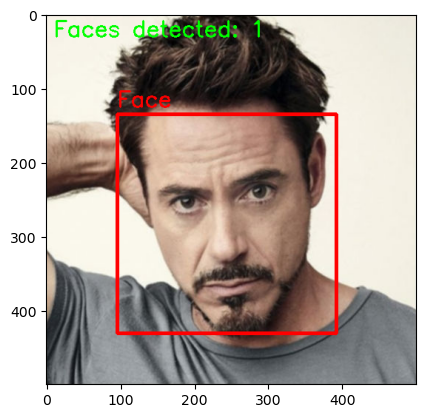

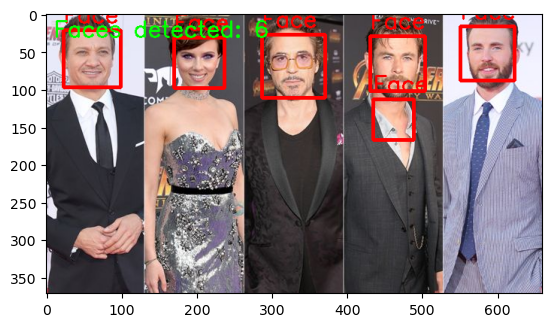

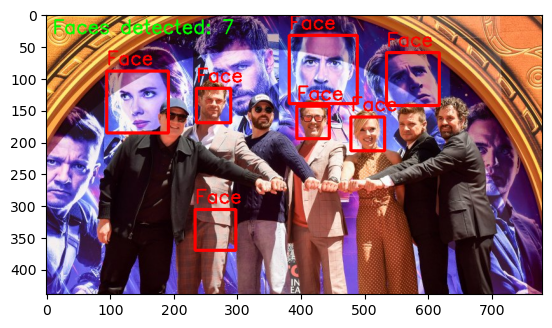

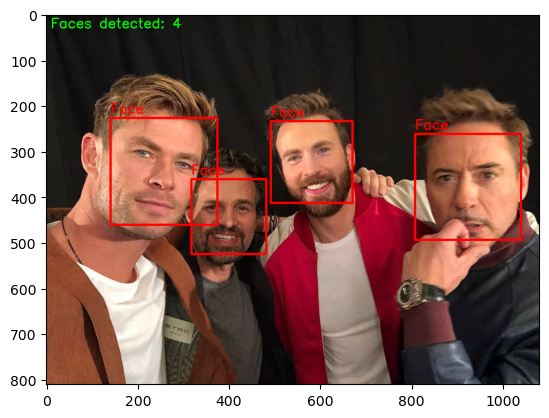

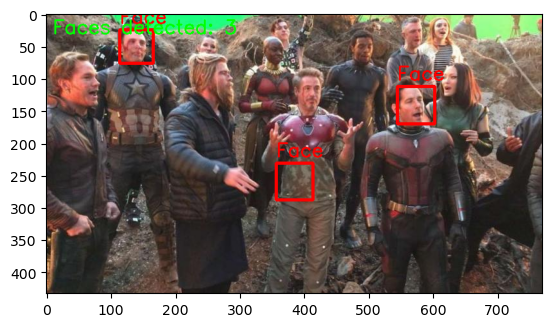

array([[545, 112,  58,  58],
       [357, 231,  57,  57],
       [114,  24,  52,  52]])

In [17]:
detectFaces('./data/tony.jpg')
detectFaces('./data/group.jpg')
detectFaces('./data/groupsmall.jpg')
detectFaces('./data/groupbig.jpg')
detectFaces('./data/groupangle.jpeg')

### Pros
1. Works almost real-time on CPU
2. Simple Architecture
3. Detects faces at different scales

### Cons
1. The major drawback of this method is that it gives a lot of False predictions.
2. Doesn’t work on non-frontal images.
3. Doesn’t work under occlusion

## 2. Histogram of Oriented Gradients (HOG) in Dlib

One of the most popular implement for face detection is offered by Dlib and uses a concept called Histogram of Oriented Gradients (HOG). This is an implementation of the original paper by Dalal and Triggs - https://lear.inrialpes.fr/people/triggs/pubs/Dalal-cvpr05.pdf

The model is built out of 5 HOG filters – front looking, left looking, right looking, front looking but rotated left, and a front looking but rotated right. The model comes embedded in the header(https://github.com/davisking/dlib/blob/master/dlib/image_processing/frontal_face_detector.h) file itself.

The dataset used for training, consists of 2825 images which are obtained from LFW dataset and manually annotated by Davis King, the author of Dlib. It can be downloaded from here - http://vis-www.cs.umass.edu/lfw/.

The idea behind HOG is to extract features into a vector, and feed it into a classification algorithm like a Support Vector Machine for example that will assess whether a face (or any object you train it to recognize actually) is present in a region or not.

The features extracted are the distribution (histograms) of directions of gradients (oriented gradients) of the image. Gradients are typically large around edges and corners and allow us to detect those regions.

In the original paper, the process was implemented for human body detection, and the detection chain was the following :

<img src="./file/hog.png">

#### Computing the gradient images
The first step is to compute the horizontal and vertical gradients of the image, by applying the following kernels :

<img src="./file/gradient.PNG">

The gradient of an image typically removes non-essential information.

#### Compute the HOG

The image is then divided into 8x8 cells to offer a compact representation and make our HOG more robust to noise. Then, we compute a HOG for each of those cells.

To estimate the direction of a gradient inside a region, we simply build a histogram among the 64 values of the gradient directions (8x8) and their magnitude (another 64 values) inside each region. The categories of the histogram correspond to angles of the gradient, from 0 to 180°. Ther are 9 categories overall : 0°, 20°, 40°… 160°.

We then calculate 2 information :
1. Direction of the gradient
2. Magnitude of the gradient

When we build the HOG, there are 3 subcases :
1. The angle is smaller than 160° and not halfway between 2 classes. In such case, the angle will be added in the right category of the HOG
2. The angle is smaller than 160° and exactly between 2 classes. In such case, we consider an equal contribution to the 2 nearest classes and split the magnitude in 2
<img src="./file/hog1.png">

3. the angle is larger than 160°. In such case, we consider that the pixel contributed proportionally to 160° and to 0°.
<img src="./file/hog2.png">

The HOG looks like this for each 8x8 cell :
<img src="./file/hog3.png">

#### Block normalization
Finally, a 16x16 block can be applied in order to normalize the image and make it invariant to lighting for example. This is simply achieved by dividing each value of the HOG of size 8x8 by the L2-norm of the HOG of the 16x16 block that contains it, which is in fact a simple vector of length 9*4 = 36.

Finally, all the 36x1 vectors are concatenated into a large vector. And we are done ! We have our feature vector, on which we can train a soft SVM classifier.

![SegmentLocal](file/hog.gif "segment")

  


In [ ]:

import cv2
import dlib
from imutils import face_utils
import matplotlib.pyplot as plt
def detectDlib(imgpath):
    # TASK 1: Load the image and convert color spaces
    # Hint: Use cv2.imread() and cv2.cvtColor()
    frame = cv2.imread(imgpath) # Load the image
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB) # Convert from BGR to RGB for display
    
    # TASK 2: Convert the image to grayscale
    # Hint: dlib's face detector works better with grayscale images
    gray = gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
    
    # TASK 3: Initialize dlib's face detector
    # Hint: Use dlib.get_frontal_face_detector()
    face_detect = dlib.get_frontal_face_detector()
    
    # TASK 4: Detect faces in the grayscale image
    # Hint: Call the detector on the grayscale image with an upsampling factor
    rects = face_detect(gray, 1)
    
    # TASK 5: Loop through each detected face and draw rectangles
    # Hint: Use face_utils.rect_to_bb() to convert dlib rectangle to (x,y,w,h) format
    for (i, rect) in enumerate(rects):
        (x, y, w, h) = face_utils.rect_to_bb(rect) # Convert dlib rectangle to (x,y,w,h) format
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 3) # Draw rectangle around the face
    
    # TASK 6: Display the result
    plt.imshow(frame) # Display the image with matplotlib
    
    plt.show()
    
    return rects

# I couldn't run this code on my local machine because of the error "ModuleNotFoundError: No module named 'dlib'".
# And my computer don't have capability to handle large software like Visual Studio 😥
# Maybe will try in lab after Mid-sem exam.

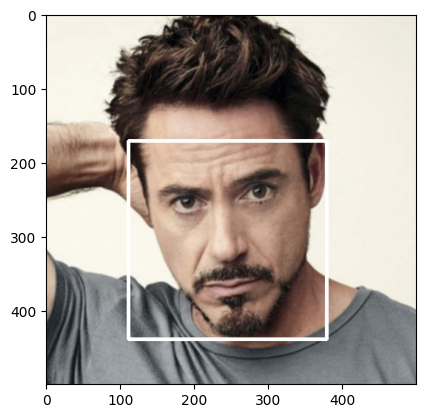

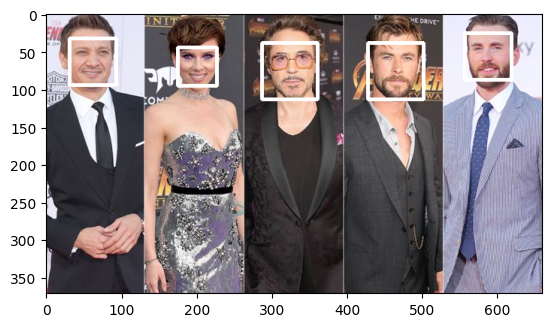

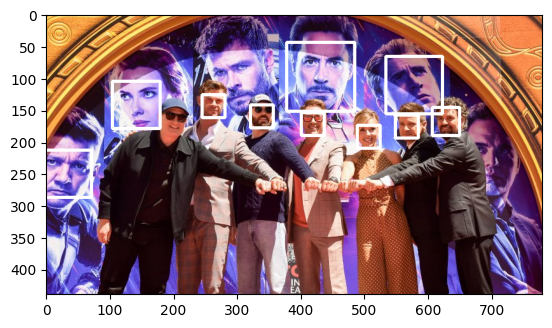

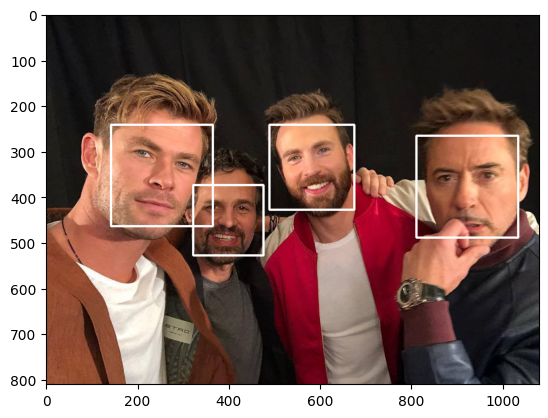

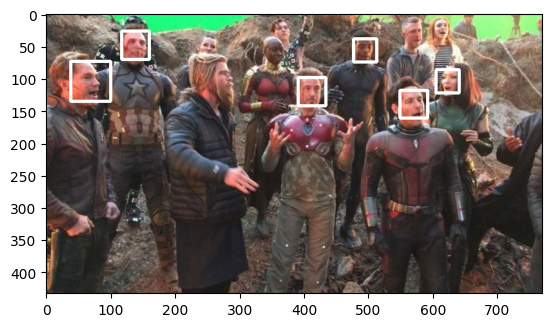

In [22]:
detectDlib('./data/tony.jpg')
detectDlib('./data/group.jpg')
detectDlib('./data/groupsmall.jpg')
detectDlib('./data/groupbig.jpg')
detectDlib('./data/groupangle.jpeg')

### Pros
2. Works very well for frontal and slightly non-frontal faces
3. Light-weight model as compared to CNN.
4. Works under small occlusion
5. Basically, this method works under most cases except a few as discussed below.

### Cons
1. The major drawback is that it does not detect small faces as it is trained for minimum face size of 80×80. Thus, you need to make sure that the face size should be more than that in your application. You can however, train your own face detector for smaller sized faces.
2. The bounding box often excludes part of forehead and even part of chin sometimes.
3. Does not work very well under substantial occlusion
4. Does not work for side face and extreme non-frontal faces, like looking down or up.
5. Really slow for real time detections